In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from torch.utils.data import DataLoader
from qml.dataset import YahooFinanceDataset
from datetime import datetime, timezone

In [2]:
DATASET_DIR = "../datasets"
BATCH_SIZE = 4

## Data Preprocessing and Exploratory Data Analysis (EDA)

### Loading the data from Yahoo Finance

I wrote a `YahooFinanceDataset` class to accomplish this since it is required to write a custom class that implements `torch.utils.data.Dataset` to use PyTorch's `DataLoader` utility later for handling training and test data.

In [3]:
dataset = YahooFinanceDataset(
    tickers=[
        "^SPX", # Standard & Poor 500 Index
        "^NDX", # Nasdaq Index
        "AAPL", # Apple
        "AMZN", # Amazon
        "META", # Meta
        "TSLA", # Tesla
    ],
    start=datetime(year=2022, month=1, day=1, tzinfo=timezone.utc),
    end=datetime(year=2024, month=1, day=1, tzinfo=timezone.utc),
    interval="1d",
    root=DATASET_DIR
)

dataloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)

In [4]:
dataset.tickers[0].head()

timestamp,open,high,low,close,volume
"datetime[ns, America/New_York]",f64,f64,f64,f64,i64
2022-01-03 00:00:00 EST,4778.140137,4796.640137,4758.169922,4796.560059,3831020000
2022-01-04 00:00:00 EST,4804.509766,4818.620117,4774.27002,4793.540039,4683170000
2022-01-05 00:00:00 EST,4787.990234,4797.700195,4699.439941,4700.580078,4887960000
2022-01-06 00:00:00 EST,4693.390137,4725.009766,4671.259766,4696.049805,4295280000
2022-01-07 00:00:00 EST,4697.660156,4707.950195,4662.740234,4677.029785,4181510000


In [5]:
dataset.tickers[0].describe()

statistic,timestamp,open,high,low,close,volume
str,str,f64,f64,f64,f64,f64
"""count""","""501""",501.0,501.0,501.0,501.0,501.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""","""2022-12-31 14:…",4190.540295,4219.012915,4160.322049,4190.937249,4.3163e9
"""std""",null,278.721615,274.053306,282.43511,278.530239,8.9136e8
"""min""","""2022-01-03 00:…",3520.370117,3608.340088,3491.580078,3577.030029,1.6395e9
"""25%""","""2022-07-05 00:…",3966.389893,4001.47998,3937.560059,3970.040039,3.8084e9
"""50%""","""2022-12-30 00:…",4155.930176,4183.600098,4128.970215,4158.240234,4.1437e9
"""75%""","""2023-07-03 00:…",4426.029785,4453.919922,4393.819824,4412.529785,4.6519e9
"""max""","""2023-12-29 00:…",4804.509766,4818.620117,4780.97998,4796.560059,9.3543e9


### Plotting the closing price of each ticker

The plot presented below uses only the daily closing price from `2022-01-01` to `2024-01-01`.

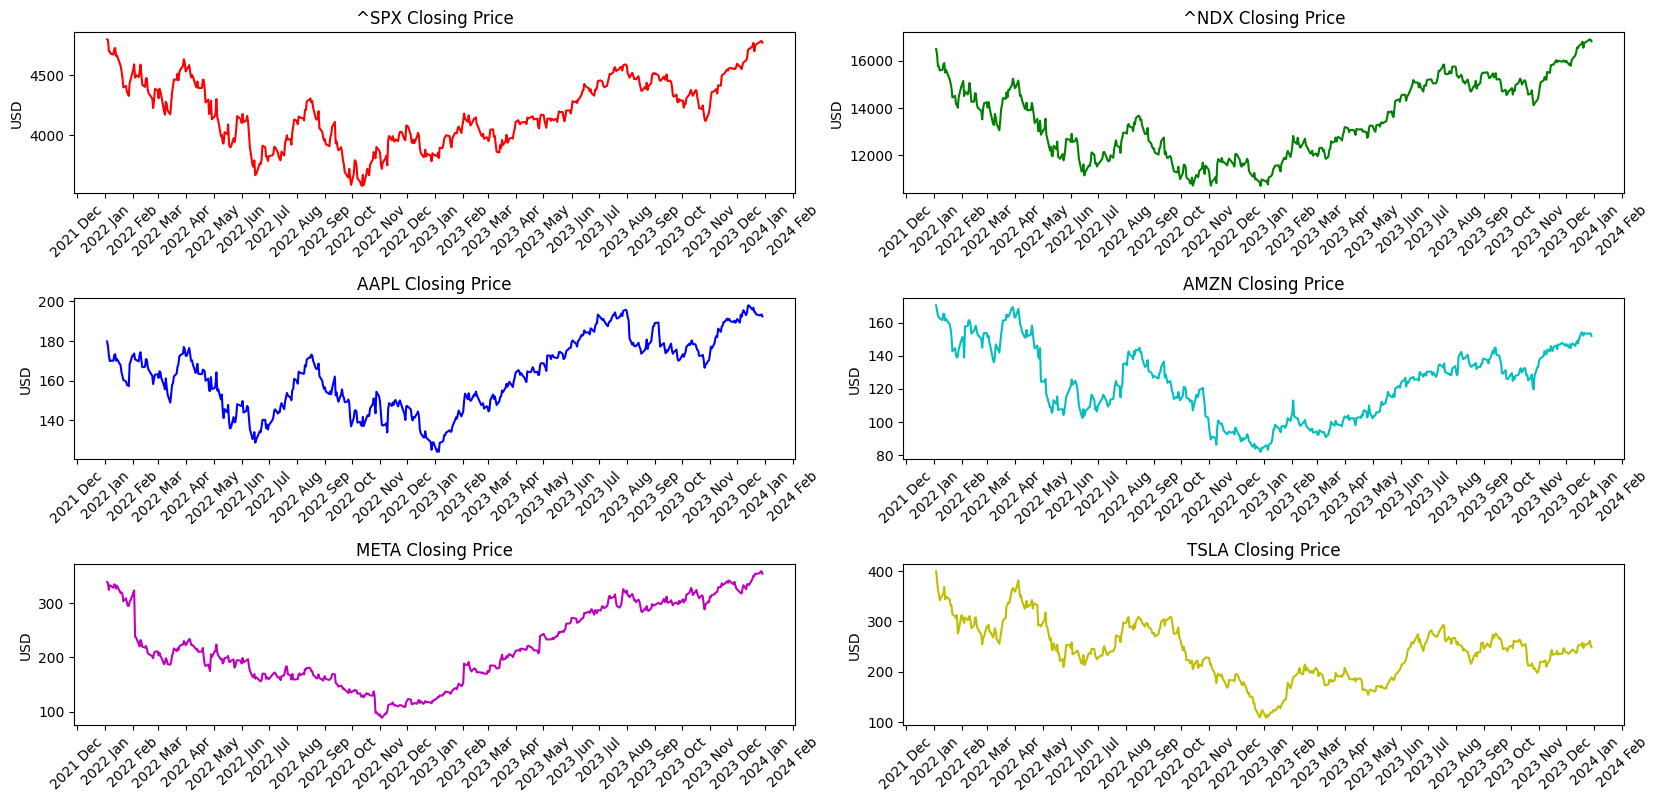

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20, 9))  
axs = axs.flat

colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot the prices for each ticker
for i, (df, ticker) in enumerate(zip(dataset.tickers, dataset.ticker_names)):
    ax = axs[i]
    ax.plot(df["timestamp"], df["close"], label=ticker, color=mcolors.BASE_COLORS[colors[i]])
    ax.set(ylabel="USD", title=f"{ticker} Closing Price")
    ax.tick_params(axis='x', labelrotation=45)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y %b"))

fig.subplots_adjust(hspace=0.65, wspace=0.15)
plt.show()

### Aggregate all tickers into one dataframe

Since we only need the closing price of each stock, we combine them into one dataframe indexed by the timestamp. This logic is implemented within the `YahooFinanceDataset` class, we access it directly for inspection.

In [8]:
dataset.data.head()

timestamp,^SPX,^NDX,AAPL,AMZN,META,TSLA
"datetime[ns, America/New_York]",f64,f64,f64,f64,f64,f64
2022-01-03 00:00:00 EST,4796.560059,16501.769531,179.724533,170.404495,338.181183,399.926666
2022-01-04 00:00:00 EST,4793.540039,16279.730469,177.443573,167.522003,336.173309,383.196655
2022-01-05 00:00:00 EST,4700.580078,15771.780273,172.723572,164.356995,323.826416,362.706665
2022-01-06 00:00:00 EST,4696.049805,15765.360352,169.84024,163.253998,332.107635,354.899994
2022-01-07 00:00:00 EST,4677.029785,15592.19043,170.008118,162.554001,331.438354,342.320007


In [9]:
dataset.data.describe()

statistic,timestamp,^SPX,^NDX,AAPL,AMZN,META,TSLA
str,str,f64,f64,f64,f64,f64,f64
"""count""","""501""",501.0,501.0,501.0,501.0,501.0,501.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2022-12-31 14:…",4190.937249,13470.563917,162.596415,123.740526,220.490966,240.329687
"""std""",null,278.530239,1617.704962,17.888387,21.66129,72.328137,55.385289
"""min""","""2022-01-03 00:…",3577.030029,10679.339844,124.166641,81.82,88.815765,108.099998
"""25%""","""2022-07-05 00:…",3970.040039,12030.05957,148.119385,104.300003,163.556458,197.369995
"""50%""","""2022-12-30 00:…",4158.240234,13259.129883,163.511444,125.779999,207.619705,241.866669
"""75%""","""2023-07-03 00:…",4412.529785,14936.69043,175.624222,139.985992,295.576416,276.040009
"""max""","""2023-12-29 00:…",4796.560059,16906.800781,197.857529,170.404495,357.940216,399.926666


### Correlation Check

Usually stock prices are correlated to one another for example, when **AAPL** goes up, the price for **^SPX** also goes up. This is due to the fact that **AAPL** is included in the **^SPX** index.

#### Calculating the correlation for each stock combination

In [11]:
corr_df = (
    dataset.data
    .select([pl.corr(pl.all(), pl.col(c)).name.suffix("|" + c) for c in dataset.data.columns]) # Calculate correlation for each possible pairing
    .melt()                                                                          
    .filter(pl.Expr.not_(pl.col("variable").str.contains("timestamp")))      # Drop results that includes the 'timestamp' column
    .with_columns(
        ticker_x=pl.col("variable").str.split("|").list.get(0),              # Add a column 'ticker_x' indicating the x ticker
        ticker_y=pl.col("variable").str.split("|").list.get(1),              # Add a column 'ticker_y' indicating the y ticker
    )
    .drop("variable")                                                        # Drop the 'variable' column (since we have ticker_x and ticker_y)
    .rename({ "value": "correlation" })                                      # Rename 'value' to 'correlation'
    .sort(by=[pl.col("ticker_x"), pl.col("ticker_y")])                       # Sort by the tickers
    .select([pl.col("ticker_x"), pl.col("ticker_y"), pl.col("correlation")]) # Reorder the sequence by selecting it
)
corr_df

ticker_x,ticker_y,correlation
str,str,f64
"""AAPL""","""AAPL""",1.0
"""AAPL""","""AMZN""",0.669779
"""AAPL""","""META""",0.875271
"""AAPL""","""TSLA""",0.411156
"""AAPL""","""^NDX""",0.939916
"""AAPL""","""^SPX""",0.863518
"""AMZN""","""AAPL""",0.669779
"""AMZN""","""AMZN""",1.0
"""AMZN""","""META""",0.636717


#### Plot the correlation matrix

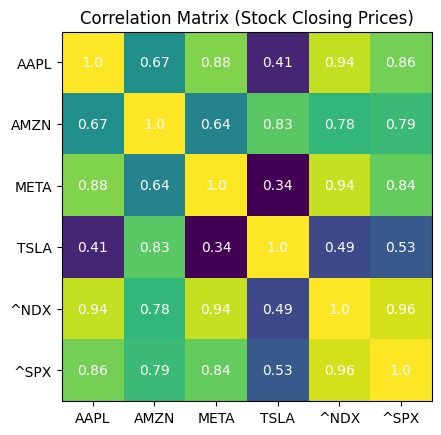

In [12]:
# Construct a 2D array of the correlation values
corr = np.zeros((6, 6))
rowi = 0
for i in range(corr_df['correlation'].count()):
    count = corr_df['ticker_x'].unique().count()
    if i > 0 and i % count == 0:
        rowi += 1
    corr[rowi][i % count] = corr_df['correlation'][i]

fig, ax = plt.subplots()
im = ax.imshow(corr) # Plot the correlation values

# Label the x and y axis
ax.set_xticks(np.arange(corr_df["ticker_x"].unique().count()), labels=corr_df["ticker_x"].unique().sort())
ax.set_yticks(np.arange(corr_df["ticker_y"].unique().count()), labels=corr_df["ticker_y"].unique().sort())

# Label the grid with value
for i in range(corr_df["ticker_x"].unique().count()):
    for j in range(corr_df["ticker_y"].unique().count()):
        ax.text(j, i, np.round(corr[i, j], 2), ha="center", va="center", color="w")

plt.title("Correlation Matrix (Stock Closing Prices)")
plt.show()

From the plot above we can see that the stocks that we are considering are generally well correlated except for **TSLA**.

### Writing a custom PyTorch Dataset class

In order to use our dataset with PyTorch we need to write a class that extends PyTorch's `Dataset` class so it plays well with the `DataLoader` and the rest of PyTorch's ecosystem.

In [13]:
for batch in dataloader:
    print(batch)

tensor([[[1.6412e+18, 4.7966e+03, 1.6502e+04, 1.7972e+02, 1.7040e+02,
          3.3818e+02, 3.9993e+02]],

        [[1.6413e+18, 4.7935e+03, 1.6280e+04, 1.7744e+02, 1.6752e+02,
          3.3617e+02, 3.8320e+02]],

        [[1.6414e+18, 4.7006e+03, 1.5772e+04, 1.7272e+02, 1.6436e+02,
          3.2383e+02, 3.6271e+02]],

        [[1.6414e+18, 4.6960e+03, 1.5765e+04, 1.6984e+02, 1.6325e+02,
          3.3211e+02, 3.5490e+02]]], dtype=torch.float64)
tensor([[[1.6415e+18, 4.6770e+03, 1.5592e+04, 1.7001e+02, 1.6255e+02,
          3.3144e+02, 3.4232e+02]],

        [[1.6418e+18, 4.6703e+03, 1.5614e+04, 1.7003e+02, 1.6149e+02,
          3.2772e+02, 3.5271e+02]],

        [[1.6419e+18, 4.7131e+03, 1.5844e+04, 1.7288e+02, 1.6536e+02,
          3.3402e+02, 3.5480e+02]],

        [[1.6420e+18, 4.7264e+03, 1.5905e+04, 1.7333e+02, 1.6521e+02,
          3.3291e+02, 3.6874e+02]]], dtype=torch.float64)
tensor([[[1.6420e+18, 4.6590e+03, 1.5496e+04, 1.7003e+02, 1.6121e+02,
          3.2613e+02, 3.4385e+02